In [1]:
#Import Libraries

from sklearn.datasets import load_boston

import math
import numpy as np
import pandas as pd
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use("ggplot")
%matplotlib inline

In [2]:
#Import Dataset

boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

df['MEDV'] = boston_dataset.target
df = df[["LSTAT","PTRATIO","RM","MEDV"]]
df.head()

,LSTAT,PTRATIO,RM,MEDV
0,4.98,15.3,6.575,24.0
1,9.14,17.8,6.421,21.6
2,4.03,17.8,7.185,34.7
3,2.94,18.7,6.998,33.4
4,5.33,18.7,7.147,36.2


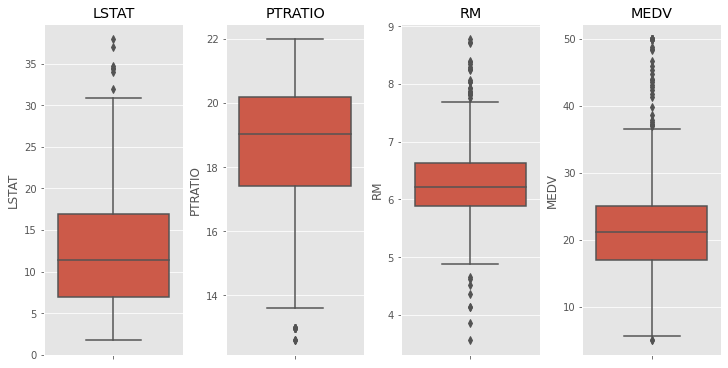

In [3]:
#Data Visualization

total_items = len(df.columns)
items_per_row = 4
total_rows = math.ceil(total_items / items_per_row)
# fig = make_subplots(rows=total_rows, cols=items_per_row)
cur_row = 1
cur_col = 1
fig, ax = plt.subplots(1, 4, figsize = (10, 5), constrained_layout = True)

for idx, col in enumerate(df.columns):
    sns.boxplot(y=col, data=df, ax=ax[idx])
    ax[idx].set_title(col)

plt.show()

In [4]:
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [5]:
#Data Preprocessing

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [6]:
def getModel(input_shape = (3, )):
    model = Sequential()
    model.add(Dense(128, input_shape=input_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.summary()

    return model

In [7]:
#Model Build, SGD

sgdModel = getModel()
sgdModel.compile(optimizer='SGD', loss='mse', metrics=['mae'])

2021-10-02 23:00:14.665976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 23:00:14.673796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 23:00:14.674181: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


2021-10-02 23:00:14.675274: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-02 23:00:14.675964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 23:00:14.676299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 23:00:14.676542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [8]:
#Model Build, Adam

adamModel = getModel()
adamModel.compile(optimizer='Adam', loss='mse', metrics=['mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [9]:
sgdHist = sgdModel.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 12ms/step - loss: 299.7924 - mae: 13.9345 - val_loss: 265.1730 - val_mae: 14.4106
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 164.8086 - mae: 9.5090 - val_loss: 45.0597 - val_mae: 5.1860
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 46.1914 - mae: 4.4908 - val_loss: 9.9807 - val_mae: 2.3484
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 24.0461 - mae: 3.3004 - val_loss: 33.7952 - val_mae: 4.3114
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 26.1995 - mae: 3.5918 - val_loss: 27.2460 - val_mae: 3.8027
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 16.3761 - mae: 2.7077 - val_loss: 11.1988 - val_mae: 2.5210
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 16.5045 - mae: 2.7813 - val_loss: 14.7621 - val_mae: 2.5059
Epoch 8/100
11/11 [==============================] - 0s 3ms/step

In [10]:
adamHist = adamModel.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 16ms/step - loss: 593.4476 - mae: 22.4992 - val_loss: 608.2567 - val_mae: 22.7520
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 563.6331 - mae: 21.8090 - val_loss: 567.8696 - val_mae: 21.8878
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 526.2596 - mae: 20.9352 - val_loss: 514.3203 - val_mae: 20.7010
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 474.3501 - mae: 19.6732 - val_loss: 441.3012 - val_mae: 19.0063
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 401.5680 - mae: 17.8770 - val_loss: 348.1927 - val_mae: 16.6749
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 308.5736 - mae: 15.5453 - val_loss: 243.5938 - val_mae: 13.6635
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 207.0182 - mae: 12.6547 - val_loss: 142.2526 - val_mae: 10.3633
Epoch 8/100
11/11 [=====================

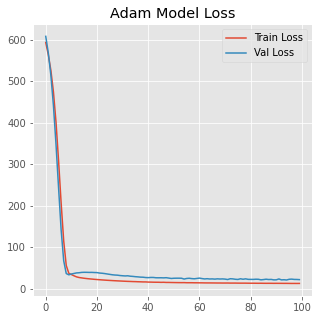

In [17]:
plt.figure(figsize = (5, 5))
plt.plot(adamHist.history["loss"], label = "Train Loss")
plt.plot(adamHist.history["val_loss"], label = "Val Loss")
plt.legend()
plt.title("Adam Model Loss")
plt.show()

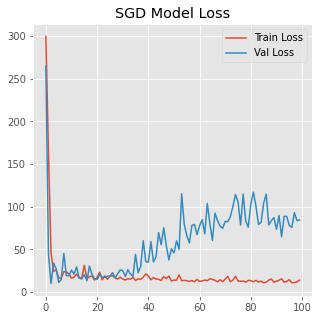

In [19]:
plt.figure(figsize = (5, 5))
plt.plot(sgdHist.history["loss"], label = "Train Loss")
plt.plot(sgdHist.history["val_loss"], label = "Val Loss")
plt.legend()
plt.title("SGD Model Loss")
plt.show()

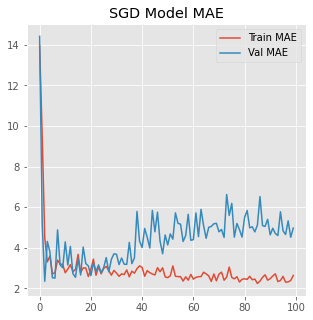

In [20]:
plt.figure(figsize = (5, 5))
plt.plot(sgdHist.history["mae"], label = "Train MAE")
plt.plot(sgdHist.history["val_mae"], label = "Val MAE")
plt.legend()
plt.title("SGD Model MAE")
plt.show()

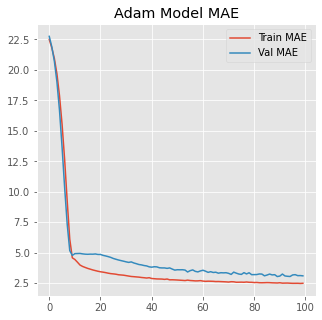

In [21]:
plt.figure(figsize = (5, 5))
plt.plot(adamHist.history["mae"], label = "Train MAE")
plt.plot(adamHist.history["val_mae"], label = "Val MAE")
plt.legend()
plt.title("Adam Model MAE")
plt.show()

In [23]:
mse_nn, mae_nn = adamModel.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 2ms/step - loss: 26.5402 - mae: 3.2701
Mean squared error on test data:  26.540212631225586
Mean absolute error on test data:  3.270059823989868


In [24]:
def Huber(y_true, y_pred, delta=1.0): 
    if(type(y_true) != np.ndarray):
        y_true = np.array(y_true) 
    if(type(y_pred) != np.ndarray):
        y_pred = np.array(y_pred)

    diff = y_true - y_pred
    norm = np.linalg.norm(diff)
    if norm <= delta: 
        return 0.5*norm
    else:
        return delta*np.linalg.norm(diff - 0.5*delta, ord = 1)

In [26]:
y_pred = adamModel.predict(X_test)
hub_loss = Huber(y_test,y_pred)
print("Huber loss:",hub_loss)

Huber loss: 514.062423324585


In [27]:
def squaredEpsilonHingeLoss(y_true, y_pred, epsilon=0.2):
    if(type(y_true) != np.ndarray):
        y_true = np.array(y_true) 
    if(type(y_pred) != np.ndarray):
        y_pred = np.array(y_pred)

    diff = np.linalg.norm(y_true - y_pred, ord=2) - epsilon**2
    loss = diff * (diff > 0.0)
    return loss.mean()/2

In [28]:
y_pred = adamModel.predict(X_test)
sehl = squaredEpsilonHingeLoss(y_test,y_pred)
print("Squared Epsilon Hinge Loss:",sehl)

Squared Epsilon Hinge Loss: 31.737330632703287


In [29]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  35.889410929907434
Mean absolute error on test data:  4.2079487254295795
